# CNN

Convolution Nerual Network

고양이 실험 처럼 이미지가 주어지면 부분 부분 작게 나누어서 생각하는 방법

-> mnist 99%!

filter라는 개념을 적용

전체적인 플로우는 Conv, Relu, Conv, Relu, Pool, Conv ..., FC => hypothesis

filter 개수에 따라 출력의 channel수가 결정 됨

4-D tensor 데이터가 왔다갔다...
(batch, height, width, channel)

`keras.layers.Conv2D`
stride가 2D로 이뤄져서 2D

# pad

(N - F) / stride + 1

7x7 입력에 3x3필터를 적용하면 5x5 출력이 나온다.
또한 똑같이 7x7입력에 3x3필터를 적용하는데 3칸씩 띄워서 만들면 하나가 모자란다.

레이어 깊게 쌓는데 지장 -> 그래서 보통 zero pad를 가장자리에 붙인다.

입력과 출력의 shape가 같도록 만듦
패딩 개수는 (F - 1) / 2

# Pooling
간단하게 sampling(resize) 하는 과정이라고 보면 됨
레이어에서 하나씩 뽑아 크기를 줄임

가장 많이 사용하는 것이 maxPooling. Average Pooling도 있다고 한다.

`keras.layers.MaxPool2D`

여기에서도 필터 개념 등장

ex)
4x4로 된 한 레이어를 2x2필터로 2칸씩

|||||
|-|-|-|-|
|1|1|2|4|
|5|6|7|8|
|3|2|1|0|
|1|2|3|4|

이런 이미지가 있을 때 2x2씩 보아 가장 큰 것 가져옴

|||
|-|-|
|6|8|
|3|4|

# Fully Conntected Layer (FC layer)

`keras.layers.Dense`
이미 많이 써봤다

# `keras.layers.Conv2D`

```py
__init__(
  filters,  # filter의 수
  kernel_size,  # filter의 크기 (tuple/list, integer)
  strides=(1, 1),  # stride 건너뜀 (tuple/list, integer)
  padding='valid',  # valid: 패딩 없음, same: Input, Output shape가 같도록 (대소구분X)
  data_format=None,  # channels_last, channels_first. (batch, height, width, channel), (batch, channel, height, width)
  dilation_rate=(1, 1),
  activation=None,
  use_bias=True,
  kernel_initializer='glorot_uniform',
  bias_initializer='zeros',
  kernel_regularizer=None,
  bias_regularizer=None,
  activity_regularizer=None,
  kernel_constraint=None,
  bias_constraint=None,
  **kwargs
)
```

커널(weight)를 수동으로 줄 경우, shape를 다음과 같은 형태로 준다.
(height, width, in_channel, out_channel)

in_channel: 말 그대로 channel. 진짜 이미지가 들어왔을 경우, rgb, gray scale등이 되겠찌??

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

image.shape (1, 3, 3, 1)


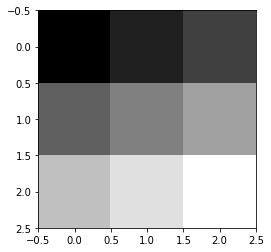

In [2]:
image = tf.constant([[[[1], [2], [3]],
                      [[4], [5], [6]],
                      [[7], [8], [9]]]], dtype=tf.float32)

plt.imshow(image.numpy().reshape(3, 3), cmap='gray')
print("image.shape", image.shape)

In [3]:
weight = np.array([[ [[1.]], [[1.]] ],
                   [ [[1.]], [[1.]] ]
                  ])
print("weight.shape", weight.shape)

weight.shape (2, 2, 1, 1)


conv2d.shape (1, 2, 2, 1)
[[12. 16.]
 [24. 28.]]


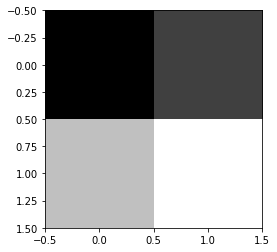

In [4]:
weight_init = tf.initializers.constant(weight)
conv2d = keras.layers.Conv2D(filters=1, kernel_size=2, padding='valid',
                             kernel_initializer=weight_init)(image)
plt.imshow(conv2d.numpy().reshape(2, 2), cmap="gray")
print("conv2d.shape", conv2d.shape)
print(conv2d.numpy().reshape(2, 2))

일력과 출력의 width, height가 같게..?

conv2d.shape (1, 3, 3, 1)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


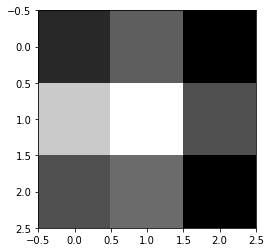

In [5]:
conv2d = keras.layers.Conv2D(filters=1, kernel_size=2, padding='same',
                             kernel_initializer=weight_init)(image)
plt.imshow(conv2d.numpy().reshape(3, 3), cmap="gray")
print("conv2d.shape", conv2d.shape)
print(conv2d.numpy().reshape(3, 3))

필터를 여러개 써보쟈!

In [6]:
weight = np.array([[ [[1., 10., -1.]], [[1., 10., -1.]] ],
                   [ [[1., 10., -1.]], [[1., 10., -1.]] ]
                  ])
print("weight.shape", weight.shape)

weight_init = tf.initializers.constant(weight)
conv2d = keras.layers.Conv2D(filters=3, kernel_size=2, padding='same',
                             kernel_initializer=weight_init)(image)
print("conv2d.shape", conv2d.shape)

weight.shape (2, 2, 1, 3)
conv2d.shape (1, 3, 3, 3)


# `keras.layers.MaxPool2D`
```py
__init__(
  pool_size=(2, 2),
  strides=None,
  padding='valid',
  data_format=None,
  **kwargs
)
```

In [7]:
image = tf.constant([[[[4], [3]],
                     [[2], [1]]]], dtype=tf.float32)
pool = keras.layers.MaxPool2D()(image)
print("pool.shape", pool.shape)
print(pool.numpy())

pool.shape (1, 1, 1, 1)
[[[[4.]]]]


In [8]:
image = tf.constant([[[[4], [3]],
                     [[2], [1]]]], dtype=tf.float32)
pool = keras.layers.MaxPool2D(strides=1, padding="same")(image)
print("pool.shape", pool.shape)
print(pool.numpy())

pool.shape (1, 2, 2, 1)
[[[[4.]
   [3.]]

  [[2.]
   [1.]]]]


# MNIST

In [9]:
(train_data, train_labels), (test_data, test_labels) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [10]:
train_data = train_data.astype(np.float32) / 255.
test_data = test_data.astype(np.float32) / 255.

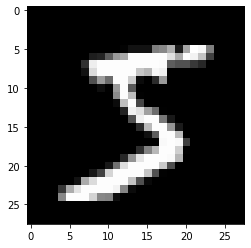

In [11]:
img = train_data[0]
plt.imshow(img, cmap='gray')

In [12]:
img = img.reshape(-1, 28, 28, 1)
img = tf.convert_to_tensor(img)

In [13]:
weight_init = tf.initializers.RandomNormal(stddev=0.01)
conv2d = keras.layers.Conv2D(5, 3, 2, 'same', kernel_initializer=weight_init)
conv2d = conv2d(img)
print(conv2d.shape)

(1, 14, 14, 5)


In [14]:
feature_maps = np.swapaxes(conv2d, 0, 3)  # batch, channel

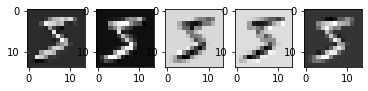

In [15]:
for i, feature_map in enumerate(feature_maps):
  plt.subplot(1, 5, i+1)
  plt.imshow(feature_map.reshape(14, 14), cmap='gray')

In [16]:
pool = keras.layers.MaxPool2D(2, 2, 'same')(conv2d)
print(pool.shape)

(1, 7, 7, 5)


In [17]:
feature_maps = np.swapaxes(pool, 0, 3)

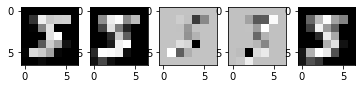

In [18]:
for i, feature_map in enumerate(feature_maps):
  plt.subplot(1, 5, i+1)
  plt.imshow(feature_map.reshape(7, 7), cmap='gray')

# NN in keras

1. Set hyper parameters (lr, epochs, batch size)
2. Make data pipelining (`tf.data`)
3. Build NN model (`keras.Sequential`)
4. define loss function `crossentropy`
5. Calculate gradient `tf.GradientTape`
6. Optimizer (Adam)
7. define a metric for model's performance (accuracy)
8. make checkpoint (save weight)
9. train and validate

## outline
```
conv (32, 3, 1, 'same')
max pool (2, 2, 'same')
conv (32, 3, 1, 'same')
max pool (2, 2, 'same')
conv (32, 3, 1, 'same')
max pool (2, 2, 'same')
FC (256)
FC (10)
```

### import library

In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import os

### set hyper parameter

In [20]:
lr = 0.001
epochs = 15
batch_size = 100

cur_dir = os.getcwd()
ckpt_dir_name = 'checkpoints'
model_dir_name = 'mnist_cnn_seq'

checkpoint_dir = os.path.join(cur_dir, ckpt_dir_name, model_dir_name)
os.makedirs(checkpoint_dir, exist_ok=True)

checkpoint_prefix = os.path.join(ckpt_dir_name, model_dir_name)

### Make data pipelining

In [21]:
mnist = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.astype(np.float32) / 255.
test_images = test_images.astype(np.float32) / 255.

# channel dim
train_images = np.expand_dims(train_images, -1)
test_images = np.expand_dims(test_images, -1)

# one hot
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

train_dataset = tf.data.Dataset.from_tensor_slices(
    (train_images, train_labels)).shuffle(100000).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices(
    (test_images, test_labels)).batch(batch_size)

### Build model

In [22]:
model = keras.Sequential([
  keras.layers.Input((28, 28, 1)),
  keras.layers.Conv2D(32, 3, 1, 'same', activation=tf.nn.relu),
  keras.layers.MaxPool2D(2, 2, 'same'),
  keras.layers.Conv2D(64, 3, 1, 'same', activation=tf.nn.relu),
  keras.layers.MaxPool2D(2, 2, 'same'),
  keras.layers.Conv2D(128, 3, 1, 'same', activation=tf.nn.relu),
  keras.layers.MaxPool2D(2, 2, 'same'),
  keras.layers.Flatten(),
  keras.layers.Dense(256, activation=tf.nn.relu),
  keras.layers.Dropout(0.4),
  keras.layers.Dense(10)
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0

## define loss function, calc gradient

In [23]:
def loss_fn(model, images, labels):
  logits = model(images, training=True)
  loss = tf.nn.softmax_cross_entropy_with_logits(labels, logits)
  return loss

def grad(model, images, labels):
  with tf.GradientTape() as tape:
    loss = loss_fn(model, images, labels)
  return tape.gradient(loss, model.variables)

## optimizer, metric, checkpoint

In [24]:
optimizer = keras.optimizers.Adam(lr)

def evaluate(model, images, labels):
  logits = model(images, training=False)
  correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(labels, 1))
  accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
  return accuracy

## train, validate

In [25]:
for epoch in range(epochs):
  avg_loss = 0.
  avg_train_acc = 0.
  avg_test_acc = 0.
  train_step = 0
  test_step = 0

  for images, labels in train_dataset:
    grads = grad(model, images, labels)
    optimizer.apply_gradients(zip(grads, model.variables))
    loss = loss_fn(model, images, labels)
    acc = evaluate(model, images, labels)
    avg_loss = avg_loss + loss
    avg_train_acc += acc
    train_step += 1
  avg_loss /= train_step
  avg_train_acc /= train_step

  for images, labels in test_dataset:
    acc = evaluate(model, images, labels)
    avg_test_acc += acc
    test_step += 1
  avg_test_acc /= test_step

  print("Epoch: {}, loss: {:.8f}, train accuracy = {:.4f}, test accuracy = {:.4f}".format(
      epoch + 1, tf.reduce_mean(avg_loss),
      avg_train_acc, avg_test_acc
  ))

Epoch: 1, loss: 0.18296154, train accuracy = 0.9564, test accuracy = 0.9876
Epoch: 2, loss: 0.04544106, train accuracy = 0.9901, test accuracy = 0.9886
Epoch: 3, loss: 0.03094572, train accuracy = 0.9933, test accuracy = 0.9917
Epoch: 4, loss: 0.02328113, train accuracy = 0.9956, test accuracy = 0.9911
Epoch: 5, loss: 0.01904086, train accuracy = 0.9963, test accuracy = 0.9923
Epoch: 6, loss: 0.01605161, train accuracy = 0.9971, test accuracy = 0.9935
Epoch: 7, loss: 0.01260001, train accuracy = 0.9980, test accuracy = 0.9912
Epoch: 8, loss: 0.01136134, train accuracy = 0.9982, test accuracy = 0.9933
Epoch: 9, loss: 0.00965962, train accuracy = 0.9987, test accuracy = 0.9935
Epoch: 10, loss: 0.00782943, train accuracy = 0.9990, test accuracy = 0.9933
Epoch: 11, loss: 0.00773769, train accuracy = 0.9989, test accuracy = 0.9910
Epoch: 12, loss: 0.00734708, train accuracy = 0.9991, test accuracy = 0.9927
Epoch: 13, loss: 0.00588251, train accuracy = 0.9993, test accuracy = 0.9937
Epoch: 1

# keras.Sequential 의 한계

multi input, output모델을 자유롭게 짤 수 없음
Inception, Redidual Connectios

In [ ]:
def create_model():
  inputs = keras.Input((28, 28, 1))
  conv1 = keras.layers.Conv2D(32, 3, 'same', activation=tf.nn.relu)(inputs)
  pool1 = keras.layers.MaxPool2D(padding='same')(conv1)
  conv2 = keras.layers.Conv2D(32, 3, 'same', activation=tf.nn.relu)(pool1)
  pool2 = keras.layers.MaxPool2D(padding='same')(conv2)
  conv3 = keras.layers.Conv2D(32, 3, 'same', activation=tf.nn.relu)(pool2)
  pool3 = keras.layers.MaxPool2D(padding='same')(conv3)

  pool3_flat = keras.layers.Flatten(pool3)
  dense4 = keras.layers.Dense(256, activation=tf.nn.relu)(pool3_flat)
  drop4 = keras.layers.Dropout(0.4)(dense4)
  logits = keras.layers.Dense(10)(drop4)
  return keras.Model(inputs, logits)

residual Block

In [ ]:
inputs = keras.Input((28, 28, 256))
conv1 = keras.layers.Conv2D(64, 1, 'same', activation=keras.layers.ReLU())(inputs)
conv2 = keras.layers.Conv2D(64, 3, 'same', activation=keras.layers.ReLU())(conv1)
conv3 = keras.layers.Conv2D(256, 1, 'same', activation=keras.layers.ReLU())(conv2)
add3 = keras.layers.add([conv3, inputs])

relu3 = keras.layers.ReLU()(add3)
model = keras.Model(inputs, relu3)

# 모델을 클래스로

-> fully-customizable model

개인적으로 추가하고 싶은 동작들을 만들 수 있다.

keras.Model 상속
`__init__`메소드에 속성들을 설정하고
`call`메소드에 레이어를 쌓는다.

In [ ]:
class MyModel(keras.Model):
  def __init__(self):
    super(MyModel, self).__init__()
    self.conv1 = keras.layers.Conv2D(32, 3, 'same', activation=tf.nn.relu)
    self.pool1 = keras.layers.MaxPool2D(padding='same')
    self.conv2 = keras.layers.Conv2D(64, 3, 'same', activation=tf.nn.relu)
    self.pool2 = keras.layers.MaxPool2D(padding='same')
    self.conv3 = keras.layers.Conv2D(128, 3, 'same', activation=tf.nn.relu)
    self.pool3 = keras.layers.MaxPool2D(padding='same')
    
    self.pool3_flat = keras.layers.Flatten()
    self.dense4 = keras.layers.Dense(256, activation=tf.nn.relu)
    self.drop = keras.layers.Dropout(0.4)
    self.dense5 = keras.layers.Dense(10)
  def call(self, inputs, training=False):
    net = self.conv1(inputs)
    net = self.pool1(net)
    net = self.conv2(net)
    net = self.pool2(net)
    net = self.conv3(net)
    net = self.pool3(net)
    net = self.pool3_flat(net)
    net = self.dense4(net)
    net = self.drop4(net)
    net = self.dense5(net)
    return net

# CNN에서 앙상블 사용하기

In [ ]:
models = []
num_models = 3
for m in range(num_models)
  models.append(MyModel())

def evaluate(models, images, labels):
  predictions = tf.zeros_like(labels)
  for model in models:
    logits = model(images, training=False)
    predictions += logits
  correct_prediction = tf.equal(tf.argmax(predictions, 1), tf.argmax(labels, 1))
  accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
  return accuracy